In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

df = pd.read_csv('/Users/lm/Desktop/Projects/Predict/BankChurners.csv')

df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
# Rename the Naive Bayes classifier columns
df = df.rename(columns={
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': 'Naive_Bayes_Classifier_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'Naive_Bayes_Classifier_2'
})

df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,1,3,3,1,2,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,0,5,2,2,4,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,1,3,2,1,3,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,0,4,3,3,4,0,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,1,3,5,1,2,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


General Information:
Check the number of rows and columns in the dataset.
Identify data types of each column.
Check for any missing values.
You can achieve this using the following code:

In [ ]:
df.info()

# Check for missing values

missing_values = df.isnull().sum()
missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Naive_Bayes_Classifier_1    0
Naive_Bayes_Classifier_2    0
dtype: int64

In [ ]:
# Check the data types of each column

column_data_types = df.dtypes
column_data_types


CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
Naive_Bayes_Classifier_1    float64
Naive_Bayes_Classifier_2    float64
dtype: object

In [ ]:
# Check for duplicate rows in the dataset

duplicate_rows = df.duplicated().sum()
duplicate_rows


0

In [ ]:
# Explore unique values in the 'Attrition_Flag' column

unique_attrition_flag = df['Attrition_Flag'].unique()
unique_attrition_flag


array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [ ]:
# Explore unique values in the 'Gender' column

unique_gender = df['Gender'].unique()
unique_gender


array(['M', 'F'], dtype=object)

In [ ]:
# Explore unique values in the 'Education_Level' column

unique_education_level = df['Education_Level'].unique()
unique_education_level

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [ ]:
# Explore unique values in the 'Marital_Status' column

unique_marital_status = df['Marital_Status'].unique()
unique_marital_status


array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [ ]:
# Explore unique values in the 'Income_Category' column

unique_income_category = df['Income_Category'].unique()
unique_income_category

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [ ]:
# Explore unique values in the 'Card_Category' column

unique_card_category = df['Card_Category'].unique()
unique_card_category


array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [ ]:
# Statistical summary of the numeric columns

numeric_summary = df.describe()
numeric_summary


,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_1,Naive_Bayes_Classifier_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


# Visual Exploratory Data Analysis (EDA)

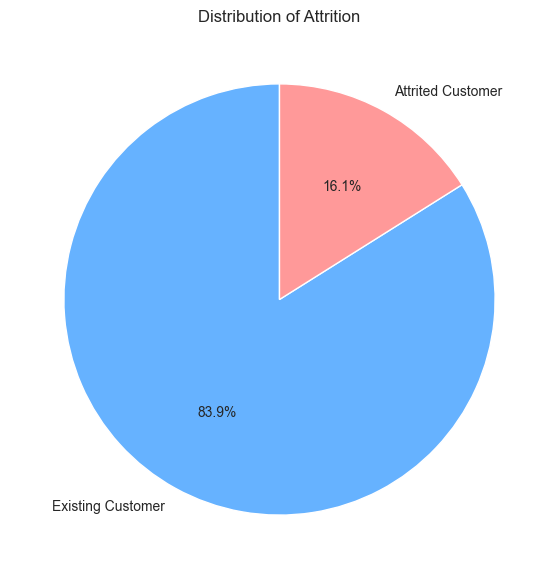

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

# Pie chart for the distribution of 'Attrition_Flag'
attrition_counts = df['Attrition_Flag'].value_counts()

plt.figure(figsize=(10, 7))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b2ff', '#ff9999'])
plt.title('Distribution of Attrition')
plt.show()


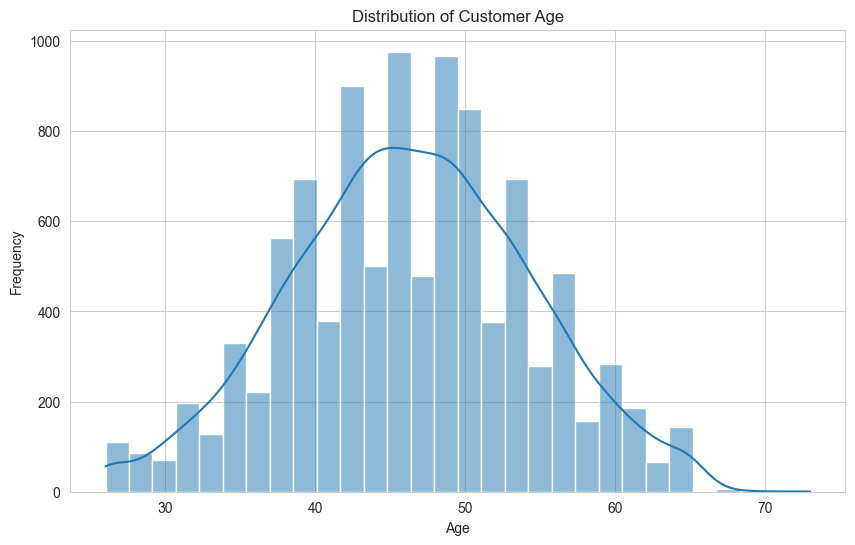

In [ ]:
# Plot a histogram for the 'Customer_Age' column
plt.figure(figsize=(10, 6))
sns.histplot(df['Customer_Age'], bins=30, kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The distribution appears to be approximately bell-shaped, indicating a normal distribution. 

The majority of customers are in the age range of 40 to 50 years. 

There's a slight skew to the right, suggesting there are relatively more younger customers than older ones. 

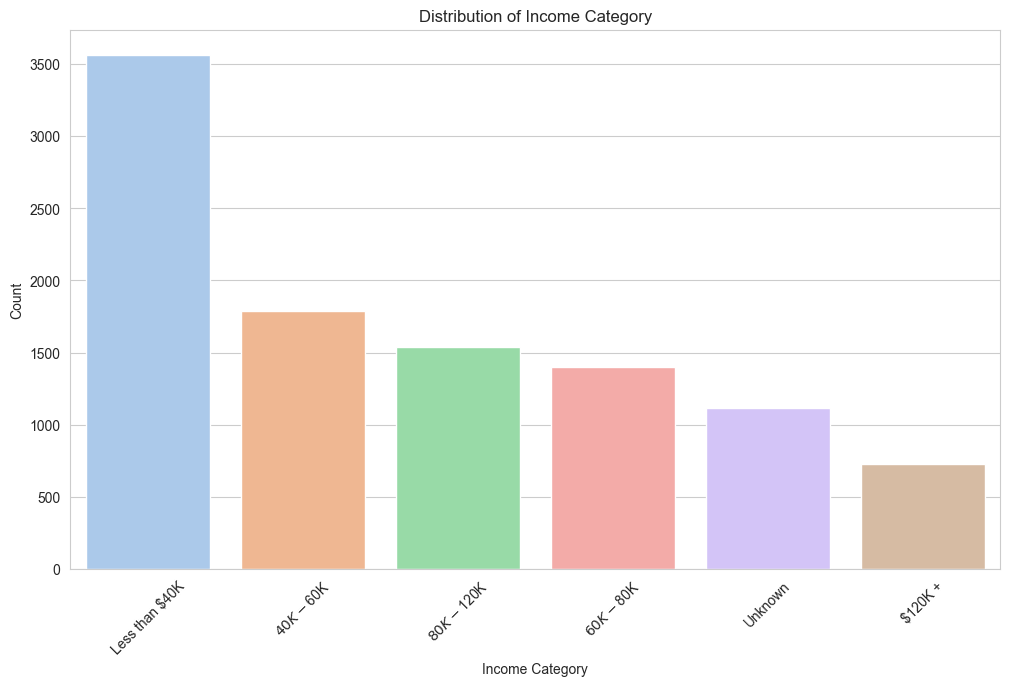

In [ ]:
# Plotting a bar chart for the 'Income_Category' column
plt.figure(figsize=(12, 7))
sns.countplot(ata=df, x='Income_Category', order=df['Income_Category'].value_counts().index, palette="pastel")
plt.title('Distribution of Income Category')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


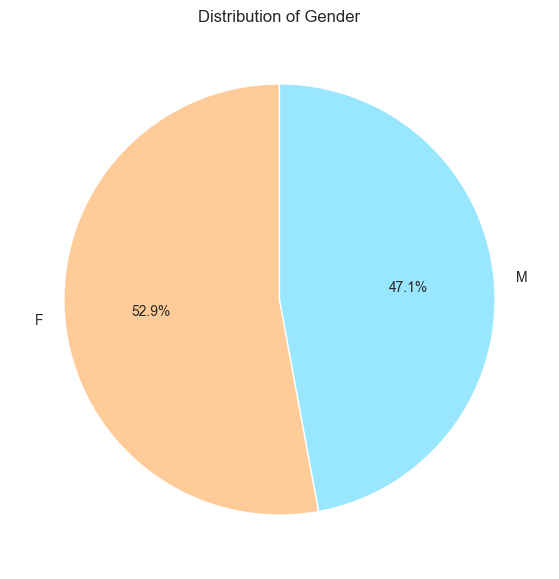

In [ ]:
# Pie chart for the distribution of 'Gender'
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(10, 7))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ffcc99', '#99e6ff'])
plt.title('Distribution of Gender')
plt.show()


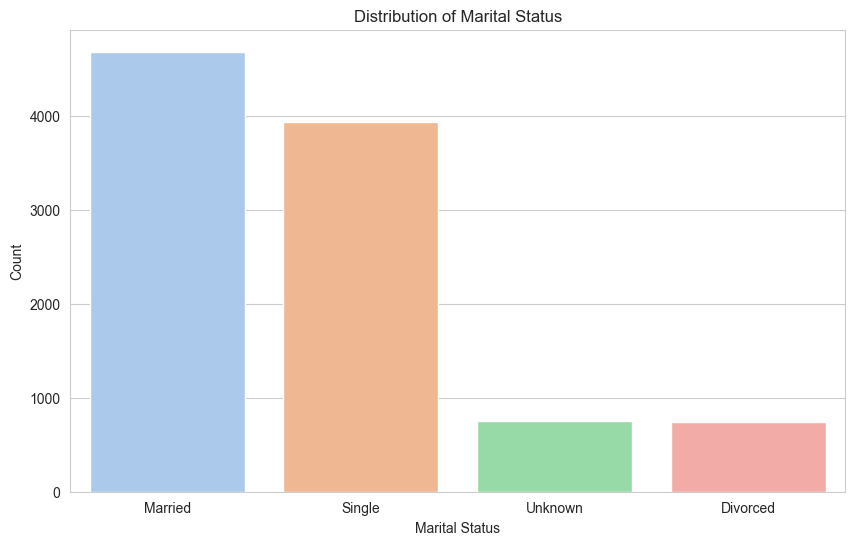

In [ ]:
# Plotting a bar chart for the 'Marital_Status' column
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital_Status', data=df, palette="pastel", order=df['Marital_Status'].value_counts().index)
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


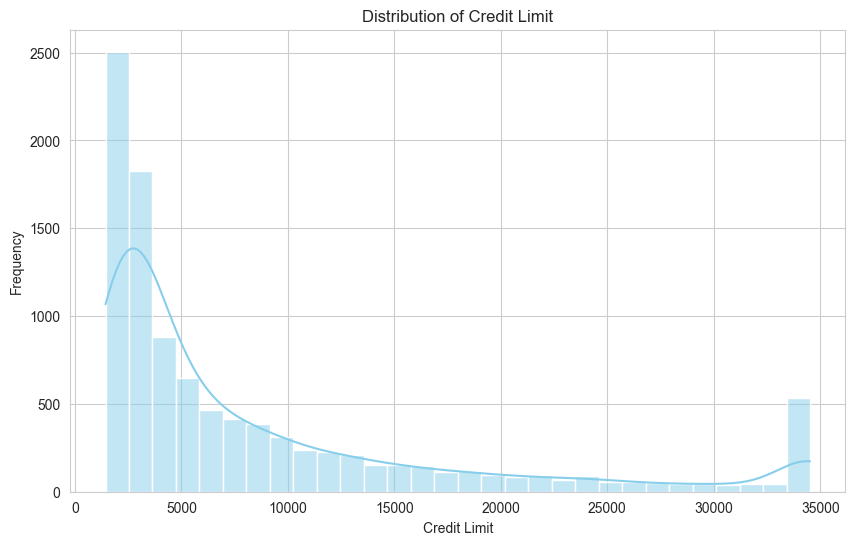

In [ ]:
# Plotting the histogram for the 'Credit_Limit' column
plt.figure(figsize=(10, 6))
sns.histplot(df['Credit_Limit'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Credit Limit')
plt.xlabel('Credit Limit')
plt.ylabel('Frequency')
plt.show()


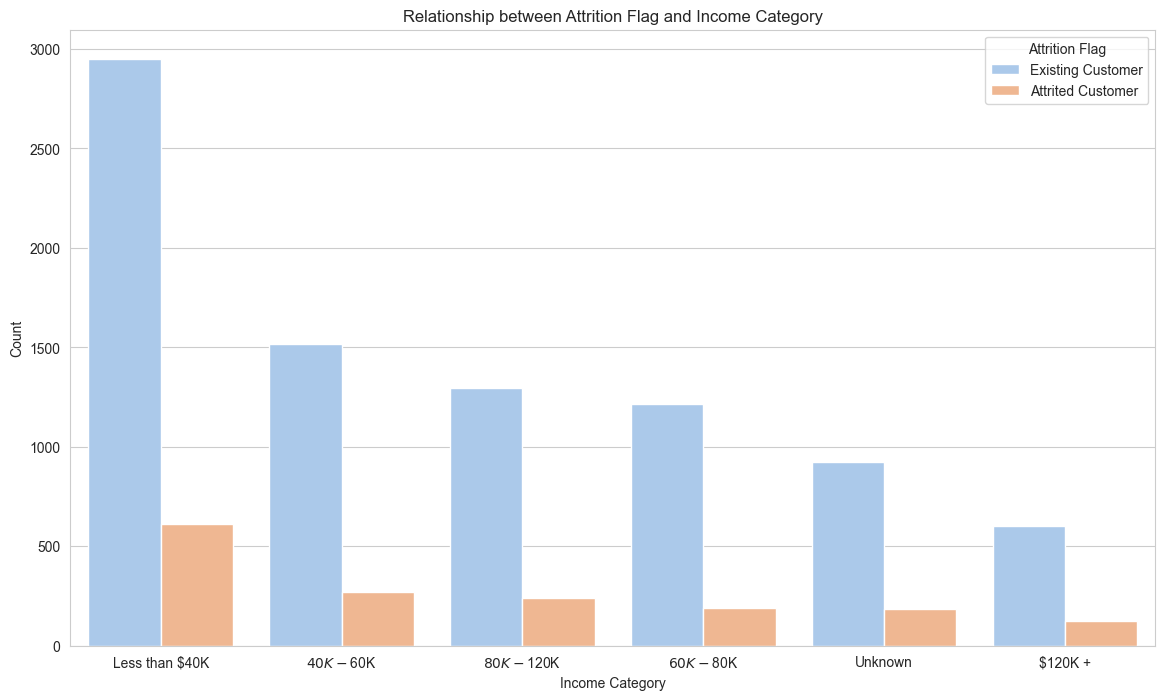

In [ ]:
# Plotting the grouped bar chart for the relationship between 'Attrition_Flag' and 'Income_Category'
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Income_Category', order=df['Income_Category'].value_counts().index, hue='Attrition_Flag', palette="pastel")
plt.title('Relationship between Attrition Flag and Income Category')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.legend(title='Attrition Flag')
plt.show()


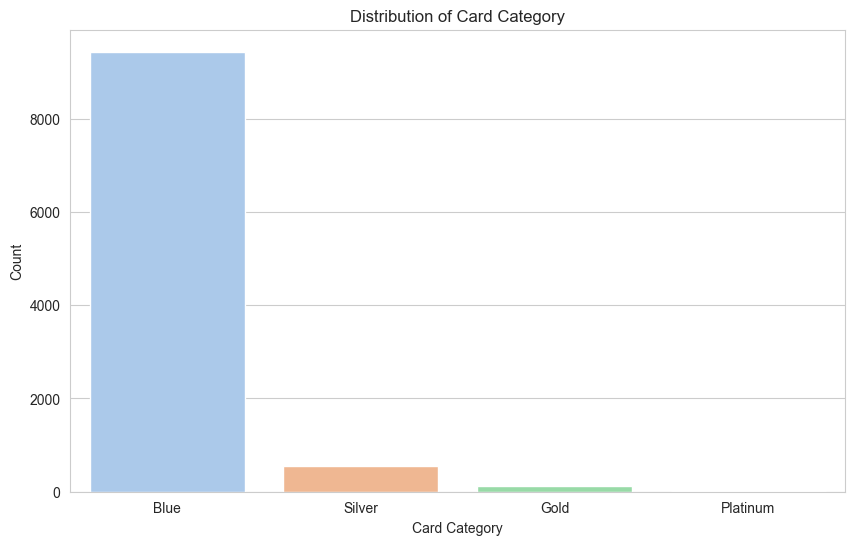

In [ ]:
# Plotting a bar chart for the 'Card_Category' column
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Card_Category', order=df['Card_Category'].value_counts().index, palette="pastel")
plt.title('Distribution of Card Category')
plt.xlabel('Card Category')
plt.ylabel('Count')
plt.show()


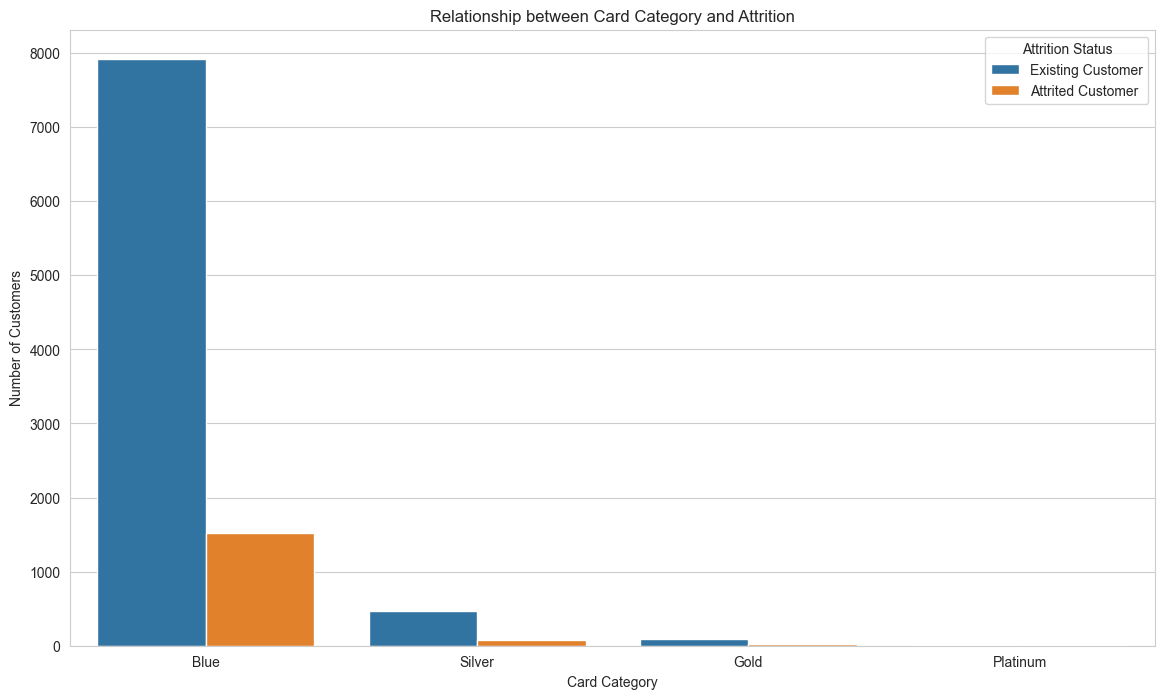

In [ ]:
# Plot the relationship between Card_Category and Attrition_Flag
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Card_Category', order=['Blue', 'Silver', 'Gold', 'Platinum'], hue='Attrition_Flag')
plt.title('Relationship between Card Category and Attrition')
plt.xlabel('Card Category')
plt.ylabel('Number of Customers')
plt.legend(title='Attrition Status')
plt.show()


While the absolute number of churned customers is highest for the Blue card, the relative proportions of churned versus existing customers seem fairly consistent across card categories. This suggests that no specific card category is particularly prone to higher attrition compared to others. I will verify this below:

In [ ]:
card_attrition_df = pd.crosstab(df['Card_Category'], df['Attrition_Flag'], normalize='index') * 100

card_attrition_df.columns = ['Existing Customer (%)', 'Attrited Customer (%)']

card_attrition_df

,Existing Customer (%),Attrited Customer (%)
Card_Category,,
0,83.902077,16.097923
1,81.896552,18.103448
2,75.000000,25.000000
3,85.225225,14.774775


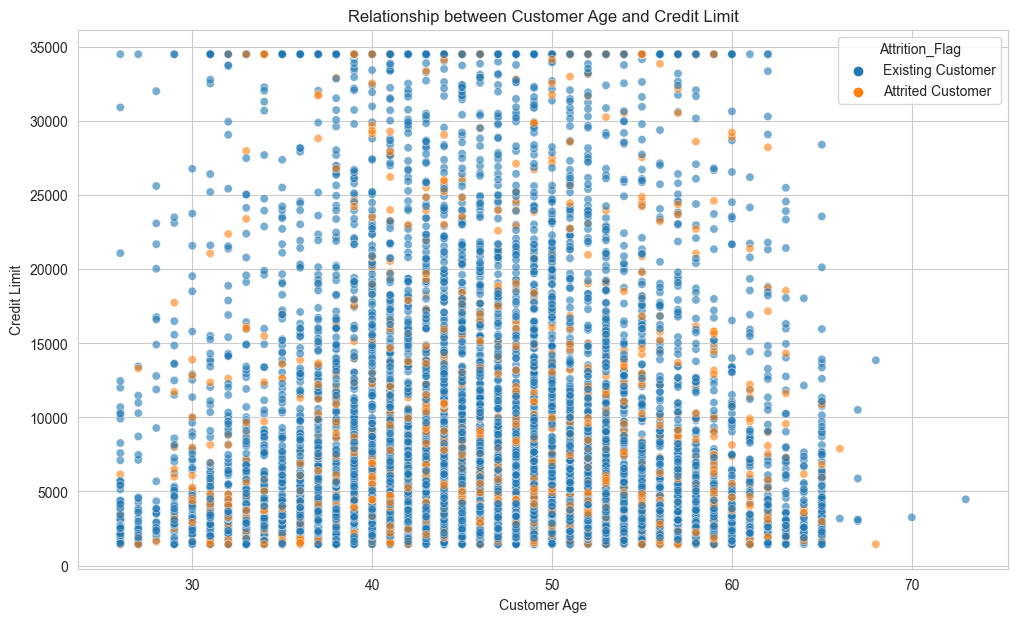

In [ ]:
# Plot the relationship between 'Customer_Age' and 'Credit_Limit'
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='Customer_Age', y='Credit_Limit', hue='Attrition_Flag', alpha=0.6)
plt.title('Relationship between Customer Age and Credit Limit')
plt.xlabel('Customer Age')
plt.ylabel('Credit Limit')
plt.show()


There doesn't appear to be a strong linear relationship between age and credit limit. Attrited Customers are scattered across all age groups and credit limits, without a pronounced concentration in any specific area.

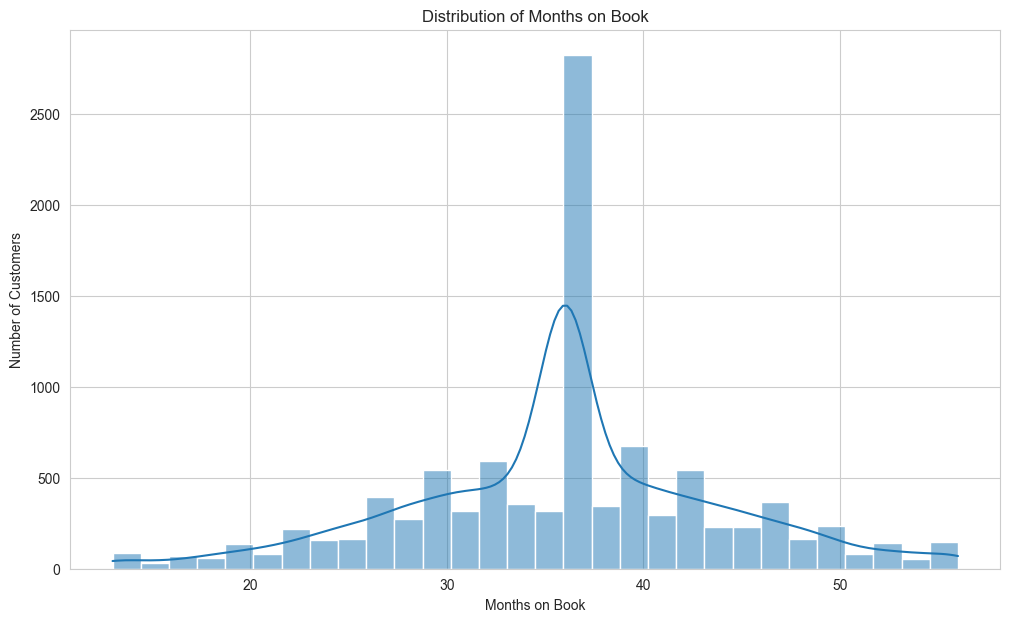

In [ ]:
# Histogram for the distribution of Months_on_book
plt.figure(figsize=(12, 7))
sns.histplot(df['Months_on_book'], bins=30, kde=True)
plt.title('Distribution of Months on Book')
plt.xlabel('Months on Book')
plt.ylabel('Number of Customers')
plt.show()

The highest peak in the distribution is around 36 months. This suggests that a significant number of customers have been with the bank for approximately 3 years.

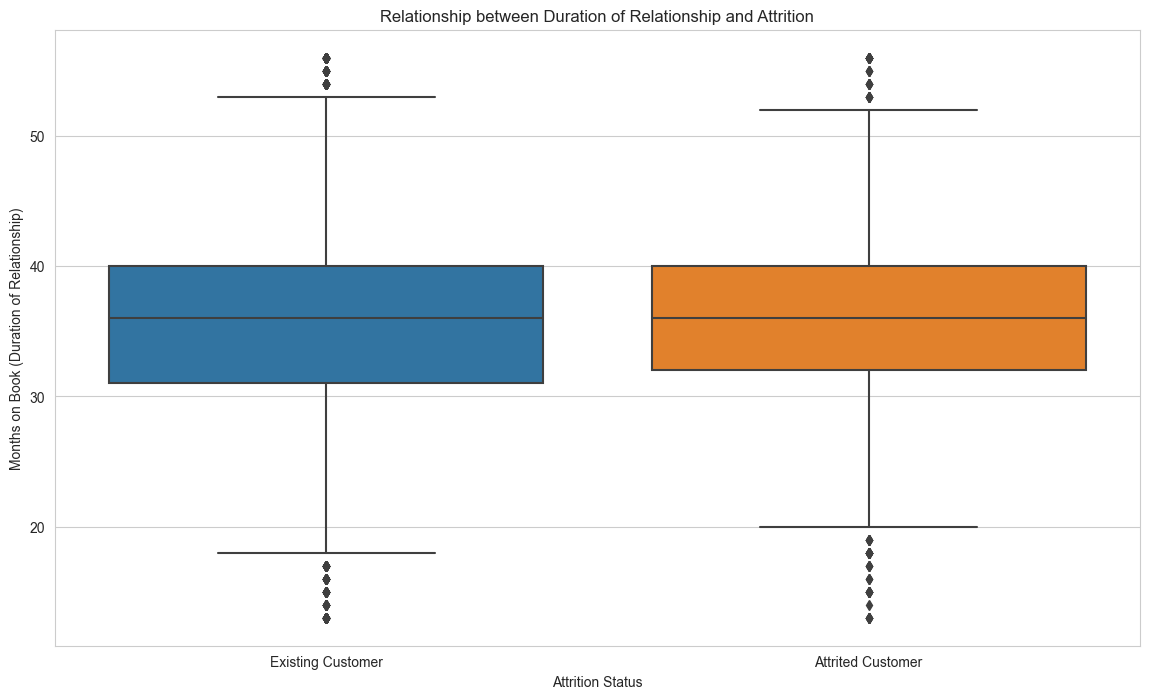

In [ ]:
# Plot the relationship between Months_on_book and Attrition_Flag
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Attrition_Flag', y='Months_on_book')
plt.title('Relationship between Duration of Relationship and Attrition')
plt.xlabel('Attrition Status')
plt.ylabel('Months on Book (Duration of Relationship)')
plt.show()


The overall duration of customer relationships seems to be relatively similar and both groups have similar medians. The duration of the relationship doesn't seem to be a strong differentiator between customers who stay and those who leave. This means that both new and long-term customers are at risk of churning, emphasising the importance of consistent engagement strategies across all stages of the customer lifecycle.


# Correlation Analysis

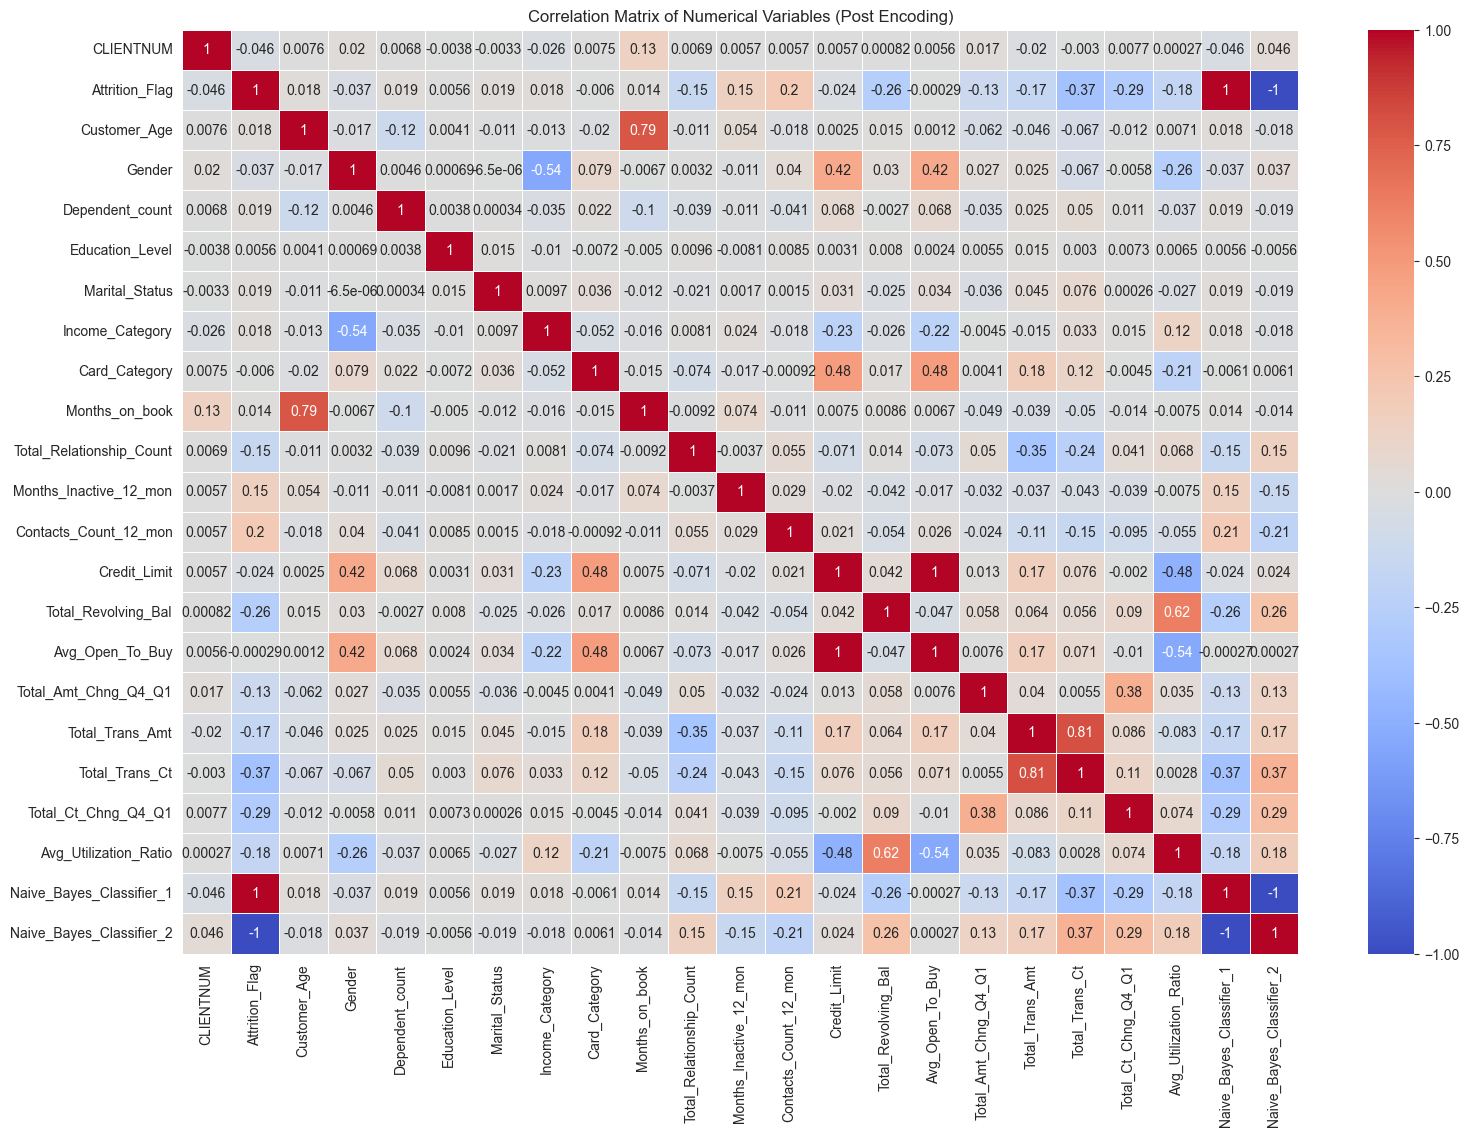

In [ ]:
from sklearn.preprocessing import LabelEncoder

# List of columns to encode
columns_to_encode = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
attrition_mapping = {"Existing Customer": 0, "Attrited Customer": 1}
df['Attrition_Flag'] = df['Attrition_Flag'].map(attrition_mapping)


# Apply label encoding to each column
for column in columns_to_encode:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

# Compute the correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables (Post Encoding)')
plt.show()




Observations:

Strong Positive Correlations:
Customer_Age and Months_on_book have a correlation of 0.79, indicating that as one's age increases, the duration with the bank (months on book) also tends to increase.
Credit_Limit and Avg_Open_To_Buy have a correlation close to 1. This is expected, as "Open to Buy" is the credit limit minus the current amount owed, so they are directly related.


Attrition Related:
No single feature seems to have an extremely high correlation with Attrition_Flag. This suggests that churn might be influenced by a combination of factors rather than any single dominant feature.
Total_Relationship_Count (-0.15) and Attrition_Flag: Customers with more products or relationships with the bank are slightly less likely to churn.
Total_Revolving_Bal (-0.26) and Attrition_Flag: Customers who maintain a higher revolving balance (or outstanding credit card balance) are less likely to churn.
Total_Trans_Amt (-0.17) and Attrition_Flag: Higher total transaction amounts are associated with a lower likelihood of attrition.
Total_Trans_Ct (-0.37) and Attrition_Flag: Customers with higher transaction counts are less likely to churn.

Data Prep for modelling

In [ ]:
# Drop the last two columns
df = df.iloc[:, :-2]

# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns

non_numeric_columns

Index([], dtype='object')

# Predictive Modelling

In [ ]:
from sklearn.preprocessing import StandardScaler

X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

df_scaled['Attrition_Flag'] = y  

df_scaled.head()


,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,0.802878,-0.165406,1.059956,0.503368,-0.052637,-0.628128,-0.574182,-0.259473,0.384621,0.763943,...,0.492404,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882,0
1,2.156861,0.333570,-0.943436,2.043199,-0.597678,0.727306,0.755053,-0.259473,1.010715,1.407306,...,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276,0
2,-0.682769,0.583058,1.059956,0.503368,-0.597678,-0.628128,0.090436,-0.259473,0.008965,0.120579,...,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155,0
3,0.832862,-0.789126,-0.943436,1.273283,-0.052637,2.082739,0.755053,-0.259473,-0.241473,-0.522785,...,-1.315636,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686,0
4,-0.814896,-0.789126,1.059956,0.503368,1.037447,-0.628128,-0.574182,-0.259473,-1.869317,0.763943,...,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155,0


In [ ]:
df_scaled['Avg_Trans_Amt'] = df_scaled['Total_Trans_Amt'] / df_scaled['Total_Trans_Ct']

df_scaled['Actual_Credit_Used'] = df_scaled['Credit_Limit'] * df_scaled['Avg_Utilization_Ratio']

df_scaled[['Avg_Trans_Amt', 'Actual_Credit_Used']].head()

,Avg_Trans_Amt,Actual_Credit_Used
0,0.985431,-0.346526
1,0.675168,0.025493
2,0.387704,0.572066
3,0.497988,-1.029858
4,0.672623,0.429651


Modelling

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_scaled.drop('Attrition_Flag', axis=1)
y = df_scaled['Attrition_Flag']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((8101, 22), (2026, 22), (8101,), (2026,))

Gaussian Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)


GaussianNB()

Logisitic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42, max_iter=1000)

lr_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

Model Evaluation

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# Predictions using the Gaussian Naive Bayes model
gnb_predictions = gnb_model.predict(X_test)

# Evaluation metrics
gnb_classification_report = classification_report(y_test, gnb_predictions)
gnb_roc_auc = roc_auc_score(y_test, gnb_predictions)

gnb_classification_report, gnb_roc_auc


('              precision    recall  f1-score   support\n\n           0       0.91      0.95      0.93      1701\n           1       0.68      0.51      0.58       325\n\n    accuracy                           0.88      2026\n   macro avg       0.80      0.73      0.76      2026\nweighted avg       0.87      0.88      0.88      2026\n',
 0.7324569257902591)

In [ ]:
# Predictions using the Logistic Regression model
lr_predictions = lr_model.predict(X_test)

# Evaluation metrics
lr_classification_report = classification_report(y_test, lr_predictions)
lr_roc_auc = roc_auc_score(y_test, lr_predictions)

lr_classification_report, lr_roc_auc


('              precision    recall  f1-score   support\n\n           0       0.92      0.97      0.94      1701\n           1       0.78      0.54      0.64       325\n\n    accuracy                           0.90      2026\n   macro avg       0.85      0.76      0.79      2026\nweighted avg       0.90      0.90      0.89      2026\n',
 0.7551214217880884)

I want to address the class imbalance to improve these results. I will do this using the Synthetic Minority Over-sampling Technique

In [ ]:
# Model Improvement using SMOTE

from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

y_train_smote.value_counts()


Attrition_Flag
0    6799
1    6799
Name: count, dtype: int64

In [ ]:
# Initialise and train the Gaussian Naive Bayes model 
gnb_model_smote = GaussianNB()
gnb_model_smote.fit(X_train_smote, y_train_smote)

# Predictions using the Gaussian Naive Bayes model on data
gnb_predictions_smote = gnb_model_smote.predict(X_test)

# Evaluation metrics
gnb_classification_report_smote = classification_report(y_test, gnb_predictions_smote)
gnb_roc_auc_smote = roc_auc_score(y_test, gnb_predictions_smote)

print(gnb_classification_report_smote)
print("ROC-AUC:", gnb_roc_auc_smote)


              precision    recall  f1-score   support

           0       0.93      0.86      0.89      1701
           1       0.47      0.64      0.54       325

    accuracy                           0.83      2026
   macro avg       0.70      0.75      0.72      2026
weighted avg       0.85      0.83      0.84      2026

ROC-AUC: 0.7512169312169312


In [ ]:
# Logistic Regression model
lr_model_smote = LogisticRegression(max_iter=1000)
lr_model_smote.fit(X_train_smote, y_train_smote)

# Predictions using the Logistic Regression model on data
y_pred = lr_model_smote.predict(X_test)

# Evaluation metrics
lr_classification_report_smote = classification_report(y_test, y_pred)
lr_roc_auc_smote = roc_auc_score(y_test, y_pred)

print(lr_classification_report_smote)
print("ROC-AUC:", lr_roc_auc_smote)

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      1701
           1       0.54      0.79      0.64       325

    accuracy                           0.86      2026
   macro avg       0.75      0.83      0.78      2026
weighted avg       0.89      0.86      0.87      2026

ROC-AUC: 0.8313046624157736


While the overall accuracy decreased slightly, the model's ability to detect attrited customers improved significantly after applying SMOTE. This is evident from the improvement in the ROC-AUC scores (0.73 to 0.75 for Gaussian NB and from 0.62 to 0.83 for LR) and most importantly for churn prediction, the recall sensitivity. 

Given that the Logistic Regression model provided better results after applying SMOTE, I will focus on the Logistic Regression model for this analysis.

Interpretation

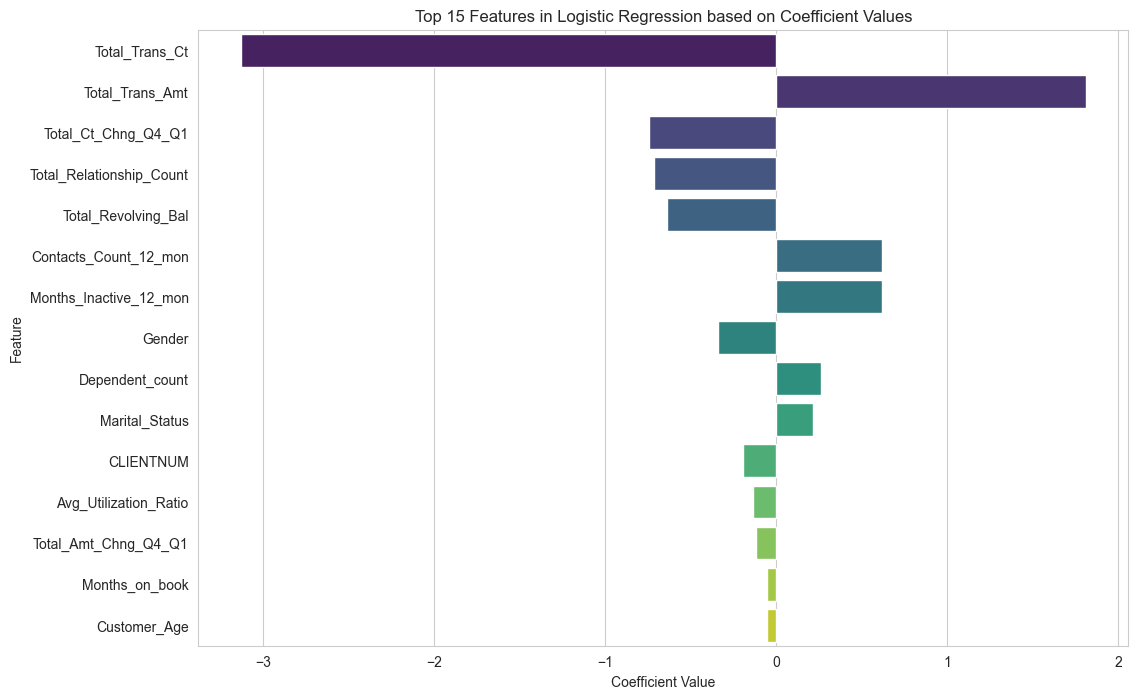

In [ ]:
# Extracting feature coefficients from the (post SMOTE) logistic regression model
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model_smote.coef_[0]
})

feature_importance = feature_importance.sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance.head(15), y='Feature', x='Coefficient', palette='viridis')
plt.title('Top 15 Features in Logistic Regression based on Coefficient Values')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


From this we can see the most significant factors are Total_Trans_Ct (negative correlation) and Total_Trans_Amt (positive correlation).

Total Transaction Count (Total_Trans_Ct)

Coefficient: -3.128982

This represents the total number of transaction in the last 12 months.

Insight: Customers with a higher transaction count are less likely to churn. This shows that customers who transact more frequently are more loyal to the bank.

Recommendation: Engage customers to transact more frequently. This can be achieved through: 

1. Encouraging customers to transact more regularly by offering more frequent limited-time promotions or discounts

2. Implementing gamification strategies where customers earn points or badges for hitting certain transaction milestones

3. Introducing loyalty programs that reward frequent transactions


Total Transaction Amount (Total_Trans_Amt)

Coefficient: 1.812908

This represents the total transaction amount in the last 12 months. 

Insights: Customers with higher transaction amounts are more likely to churn. This could indicate that high-spending customers have higher expectations from the bank or are being approached by competitors with better offers for their spend.

Recommendation: Encourage loyalty from customers who make high value transactions. Potential strategies include: 

1. Creating specialised offers or services for high-spending customers e.g. access to premium services or higher-tiered loyalty rewards

2. Engage high-spending customers with proactive tailored communication, ensuring they feel valued by the bank and allowing the opportunity for regular feedback

3. Competitive benchmarking of rates, fees, rewards, etc. to ensure offerings remain the preferred option for customers

This data provided us with limited demogrpahic data. From this, we have been able to understand the factors influencing customer churn and provide actionable insights to reduce it.
However, there are likely other factors beyond demographic data that influence a customer's decision to stay with their bank. To confidently predict attrition, it would be beneficial for banks to gather more comprehensive data about customers to enable more robust models to be built.